In [1]:
import scipy.io
import os

In [2]:
data_path = ['data']
filepath = os.sep.join(data_path + ['data2.mat'])
mat = scipy.io.loadmat(filepath)

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
data = mat['X']
data

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

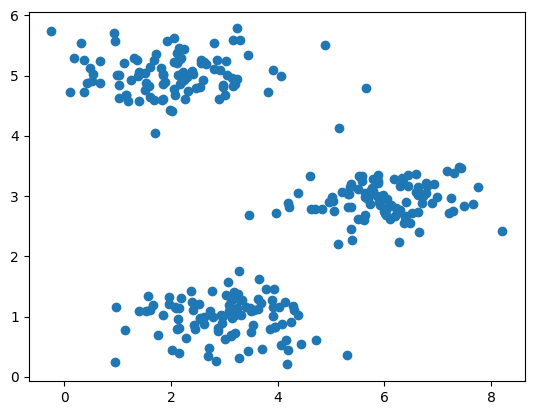

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X, y = np.hsplit(data, 2)
plt.scatter(X, y)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(data)

In [7]:
clustered_data = np.append(data, np.reshape(kmeans.labels_, (300, 1)), 1)

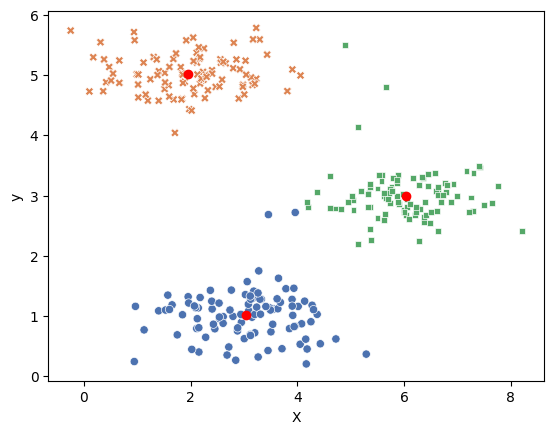

In [8]:
import pandas as pd
import seaborn as sns

clustered_df = pd.DataFrame(clustered_data, columns=['X', 'y', 'c'])
sns.scatterplot(data=clustered_df, x='X', y='y', hue='c', style='c', palette='deep')

for point in kmeans.cluster_centers_:
    plt.scatter(point[0], point[1], marker='o', c='red')
plt.legend([],[], frameon=False)

In [9]:
labels = []
centers = []
inertias = []
r = range(1,21)
for n_clusters in r:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(data)
    labels.append(kmeans.labels_)
    centers.append(kmeans.cluster_centers_)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Cost/Inertia')

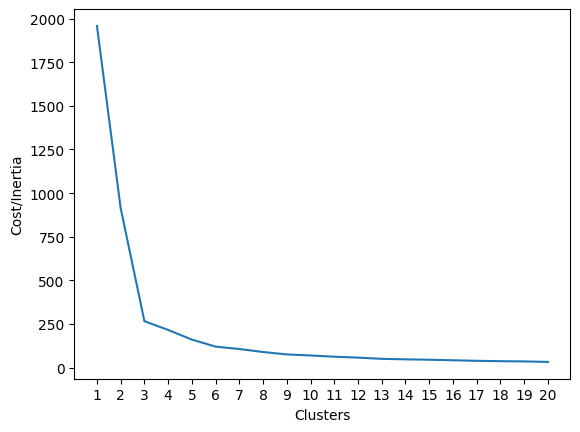

In [10]:
plt.plot(r, inertias)
plt.xticks(r)
plt.xlabel('Clusters')
plt.ylabel('Cost/Inertia')

## QUAL A MELHOR QUANTIDADE DE CLUSTERS?
 Podemos usar um método de 'queda mínima' onde paramos de adicionar clusteres quando o valor do custo parar de cair em alto número. Se pararmos quando o custo não cair em 50%, iremos parar com 3 clusters.
 Claro, se tivermos 300 clusters o custo irá se tornar zero. Mas não estaremos separando os dados de maneira relevante.

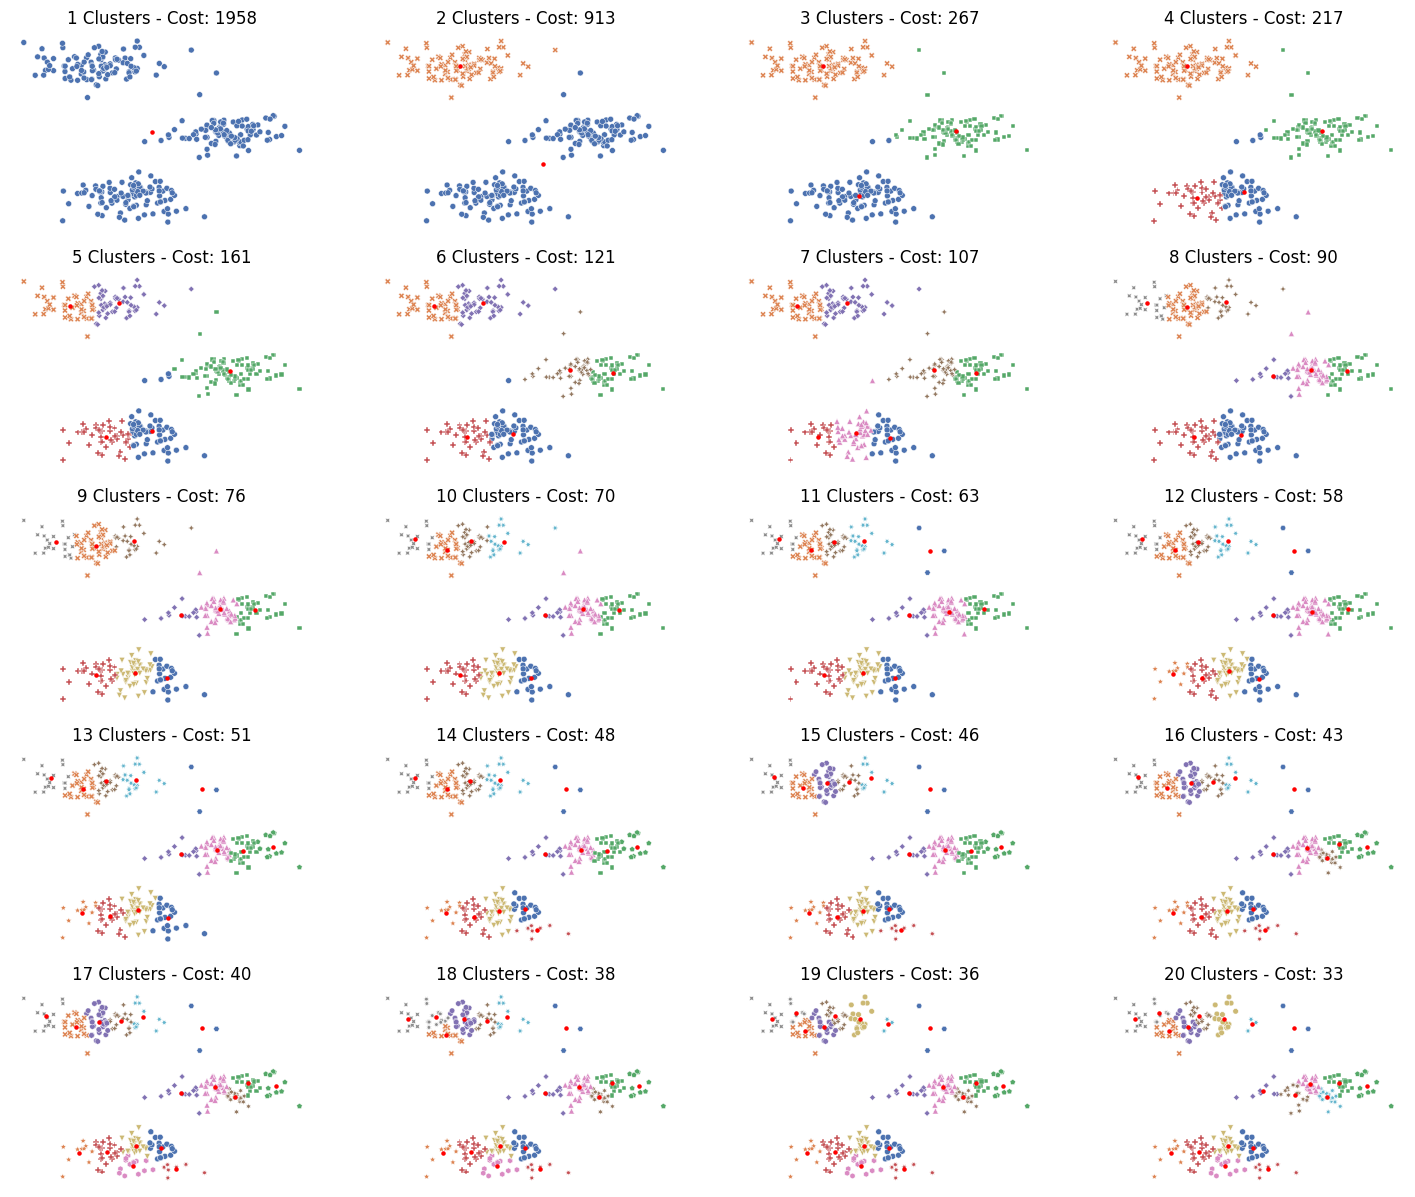

In [11]:
fig, axes = plt.subplots(5, 4, figsize=(18,15))

for i, label, center, cost in zip(range(len(labels)), labels, centers, inertias):
    # print(i, label, center, cost)
    ax = axes.flatten()[i]
    clustered = np.append(data, np.reshape(label, (300, 1)), 1)
    clustered = pd.DataFrame(clustered, columns=['X', 'y', 'c'])
    sns.scatterplot(ax=ax, data=clustered, x='X', y='y', hue='c', style='c', palette='deep', size=1)

    for point in center:
        ax.scatter(point[0], point[1], marker='o', c='red', s=5)
    ax.set(
        title=f'{len(center)} Clusters - Cost: {round(cost)}',

    )
    ax.legend([],[], frameon=False)
    ax.axis('off')
    # ax.title(f'{len(center)} Clusters - Cost: {cost}')

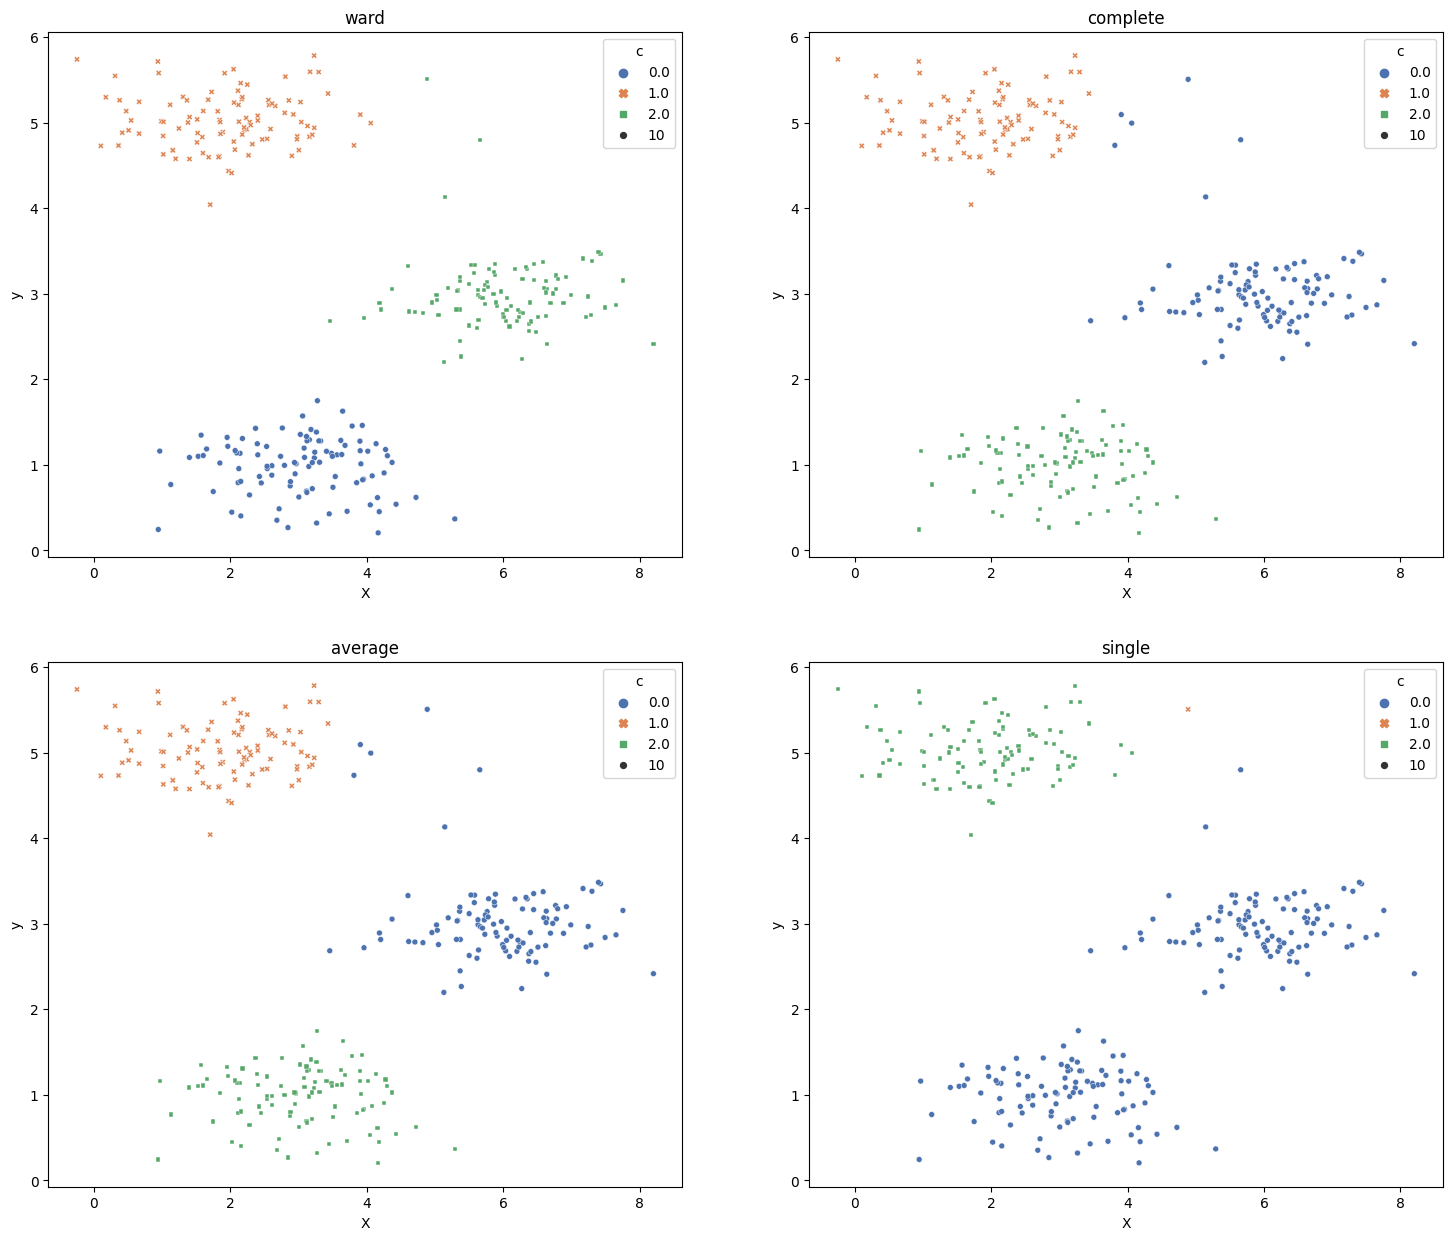

In [12]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(18,15))
labels = []
for i, linkage in enumerate(linkages):
    ax = axes.flatten()[i]
    AC = AgglomerativeClustering(n_clusters=3, linkage=linkage).fit(data)
    labels.append(AC.labels_)
    AC_clustered = np.append(data, np.reshape(AC.labels_, (300, 1)), 1)
    AC_clustered = pd.DataFrame(AC_clustered, columns=['X', 'y', 'c'])
    sns.scatterplot(ax=ax, data=AC_clustered, x='X', y='y', hue='c', style='c', palette='deep', size=10)
    ax.set_title(f'{linkage}')